In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import math, time
import itertools
from sklearn import preprocessing
import datetime
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import LSTM
from keras.models import load_model
import keras
import h5py
import requests
import os
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/ALL-SEM-07/ML_DL  

[Errno 2] No such file or directory: '/content/drive/MyDrive/ALL-SEM-07/ML_DL'
/content


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import time #helper libraries
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis

In [ ]:
dataset_train  = pd.read_csv("/content/drive/MyDrive/ALL-SEM-07/ML_DL /NSE-TATAGLOBAL.csv")

In [ ]:
training_set = dataset_train.iloc[:, 1:2].values
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [ ]:
dataset_train.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Open                    1.497137e+02
High                    1.519928e+02
Low                     1.472939e+02
Last                    1.494743e+02
Close                   1.494503e+02
Total Trade Quantity    2.335681e+06
Turnover (Lacs)         3.899981e+03
dtype: float64

In [ ]:
dataset_train.count()

Date                    2035
Open                    2035
High                    2035
Low                     2035
Last                    2035
Close                   2035
Total Trade Quantity    2035
Turnover (Lacs)         2035
dtype: int64

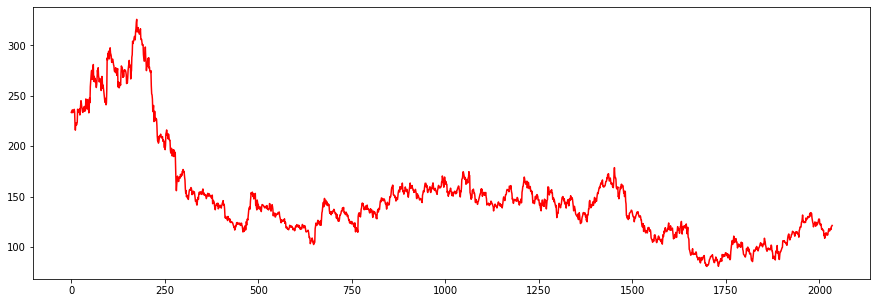

In [ ]:
plt.figure(figsize=(15, 5));
plt.plot(dataset_train['Close'], color='red', label='open')
#plt.plot(dataset_train[dataset_train.symbol == 'EQIX'].close.values, color='green', label='close')
#plt.plot(dataset_train[dataset_train.symbol == 'EQIX'].low.values, color='blue', label='low')
#plt.plot(df[df.symbol == 'EQIX'].high.values, color='black', label='high')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU, Bidirectional
from keras.layers import Dropout

In [ ]:
dataset_test = pd.read_csv('/content/drive/MyDrive/ALL-SEM-07/ML_DL /tatatest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [ ]:
regressorGRU = Sequential()

regressorGRU.add(GRU(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1), activation='sigmoid'))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='sigmoid'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))


regressorGRU.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressorGRU.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
62/62 [==============================] - 16s 126ms/step - loss: 0.0538
Epoch 2/100
62/62 [==============================] - 8s 125ms/step - loss: 0.0408
Epoch 3/100
62/62 [==============================] - 8s 125ms/step - loss: 0.0397
Epoch 4/100
62/62 [==============================] - 8s 125ms/step - loss: 0.0391
Epoch 5/100
62/62 [==============================] - 9s 153ms/step - loss: 0.0365
Epoch 6/100
62/62 [==============================] - 8s 124ms/step - loss: 0.0354
Epoch 7/100
62/62 [==============================] - 8s 123ms/step - loss: 0.0317
Epoch 8/100
62/62 [==============================] - 9s 146ms/step - loss: 0.0149
Epoch 9/100
62/62 [==============================] - 8s 124ms/step - loss: 0.0075
Epoch 10/100
62/62 [==============================] - 8s 124ms/step - loss: 0.0059
Epoch 11/100
62/62 [==============================] - 8s 124ms/step - loss: 0.0050
Epoch 12/100
62/62 [==============================] - 8s 124ms/step - loss: 0.0042
Epoch 13/100

In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressorGRU.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


1/1 [==============================] - 1s 1s/step


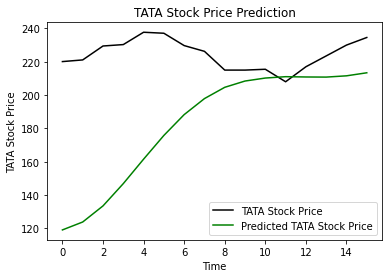

In [ ]:
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()

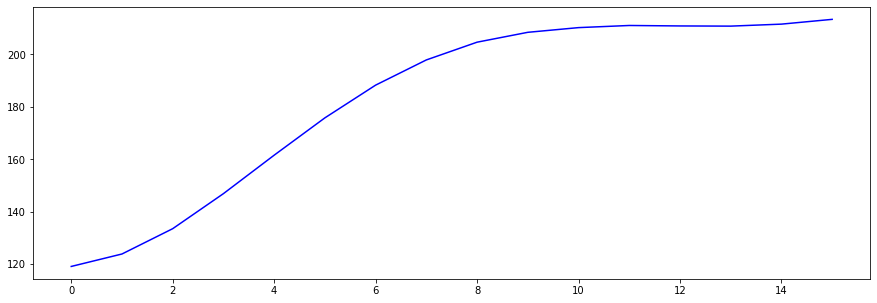

In [ ]:
plt.figure(figsize=(15, 5));
plt.plot(predicted_stock_price, color='blue', label='open')